In [2]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

In [3]:
a      = 1.0                         # g(X) = x2 - ax1 - b
b      = -0.1                        # 
N_list = [2**i for i in range(1,7)]  # Число процессоров
Cf_list = [1.0e2, 1.0e3, 1.0e4]      # Вычислительная сложность вектор-ф-ии F(X)

m  = 100                             # 
l  = 8                               # Длина вещ. числа в байтах
t  = 10e-9                           # Время выполнения арифм. оп. с плавающей точкой
ts = 50e-6                           # Латентность комм. сети
tc = (1/80)*1e-6                     # Время передачи данных между двумя соседними проц.

def d(N):                            # Диаметр коммуникационной сети
    return 2*np.sqrt(N)-1

Z_side = 256                         # Размерность сетки
Z = Z_side**2                        # Количество узлов в сетке

In [4]:
# Метод равномерной декомпозиции параллелепипеда П
nodes_all = np.array([x for x in itertools.product(np.linspace(0., 1., Z_side), np.linspace(0., 1., Z_side))])
g = nodes_all[:, 1] - a*nodes_all[:, 0] - b

# Количество всех узлов в подобласти Пi
def z(i, N):
    z, _ = np.histogram(nodes_all[:, 0], bins=np.linspace(0., 1., N+1))
    return z[i]

# Количество узлов с g > 0 в подобласти Пi
def dzeta(i, N):
    dzeta, _ = np.histogram(nodes_all[g > 0][:, 0], bins=np.linspace(0., 1., N+1))
    return dzeta[i]

# Оценка времени решения на процессоре Pi для метода равномерной декомпозиции параллелепипеда П
def tau(i, N, Cf=Cf):
    return 2*ts + z(i, N)*N*l*d(N)*tc + dzeta(i, N)*m*l*d(N)*tc + t*dzeta(i, N)*Cf

# Оценка времени параллельного решения
def T_parallel(N, Cf=Cf):
    return max([tau(i, N, Cf) for i in range(N)])

# Оценка времени однопоточного решения
def T_single(Cf=Cf):
    return t*Cf*nodes_all[g > 0].shape[0]

# Оценка ускорения
def S(N, Cf=Cf):
    return T_single(Cf)/T_parallel(N, Cf)

In [12]:
data = {
    'N': [],
    'S': [],
    'Cf': []
}

for Cf in Cf_list:
    data['N'] += N_list
    data['Cf'] += [Cf]*len(N_list)
    data['S'] += [S(N, Cf) for N in N_list]

data = pd.DataFrame(data)
data

,N,S,Cf
0,2,0.071811,100.0
1,4,0.077217,100.0
2,8,0.092943,100.0
3,16,0.115713,100.0
4,32,0.138704,100.0
5,64,0.154019,100.0
6,128,0.153986,100.0
7,256,0.137766,100.0
8,512,0.056178,100.0
9,1024,0.021494,100.0


Text(0.5, 1.0, 'Зависимость ускорения S от количества процессоров N для различных Cf (декомпозиция паралелепипеда)')

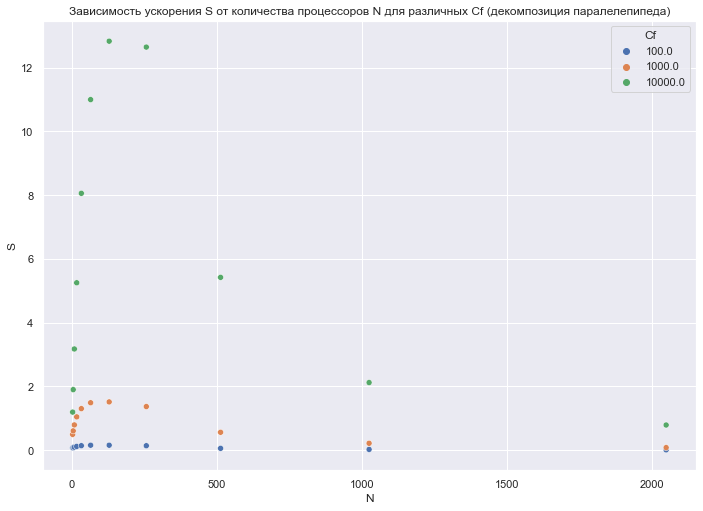

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    data=data,
    x='N',
    y='S',
    hue="Cf",
    palette='deep'
).set_title('Зависимость ускорения S от количества процессоров N для различных Cf (декомпозиция паралелепипеда)')